# Open exploration
Exploring 1000 scenarios over the whole uncertainty space with lhs. 60 replications are used. This notebook includes the following:

- Fitting a linear regression model
- Feature scoring using the extra trees algorithm
- Visual analysis using plotting
- Scenario discovery using PRIM

In [1]:
from ema_workbench.analysis import prim
from ema_workbench import load_results
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

/home/geodan-florisb/anaconda3/envs/CrowdSim/lib/python3.10/site-packages/ema_workbench-2.1.1-py3.10.egg/ema_workbench/em_framework/evaluators.py:57: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  warnings.warn("ipyparallel not installed - IpyparalleEvaluator not available")
/home/geodan-florisb/anaconda3/envs/CrowdSim/lib/python3.10/site-packages/ema_workbench-2.1.1-py3.10.egg/ema_workbench/analysis/prim.py:30: ImportWarning: altair based interactive inspection not available
  warnings.warn(


In [2]:
# load orginal data
experiments_original, results = load_results('../data/output/EMA/resultsOpenExploration.tar.gz')

In [3]:
# convert groupforming column in experiments to readable format
# e.g. [0.5, 0.38, 0.075, 0.03, 0.015] translates to 50% groupForming
groups = {str([[round(0.5 - num/100, 2), round(0.38 + num/100, 2), 0.075, 0.03, 0.015] for i in range(4)]):(50 + num) for num in range(0, 36)}
experiments = experiments_original.copy()
experiments = experiments.astype({'groupForming': str})
experiments = experiments.replace({'groupForming': groups})

In [4]:
experiments.head()

,groupForming,meanFreeFlowSpeed,obstPotentialHeight,pedPotentialHeight,sdFreeFlowSpeed,spawnFrequencyA,spawnFrequencyB,spawnFrequencyC,spawnFrequencyD,scenario,policy,model
0,80,0.948193,6.935441,42.012624,0.262012,4.0,2.0,5.0,3.0,0,None,model
1,58,0.757105,9.017644,20.245345,0.212828,2.0,3.0,4.0,1.0,1,None,model
2,76,0.947884,9.237989,49.573823,0.201071,1.0,1.0,5.0,1.0,2,None,model
3,56,0.812048,9.385852,49.971579,0.292243,3.0,4.0,1.0,3.0,3,None,model
4,66,1.003328,3.577617,44.399576,0.153377,3.0,1.0,5.0,2.0,4,None,model


In [5]:
experiments.describe()

,groupForming,meanFreeFlowSpeed,obstPotentialHeight,pedPotentialHeight,sdFreeFlowSpeed,spawnFrequencyA,spawnFrequencyB,spawnFrequencyC,spawnFrequencyD
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,67.499000,0.910000,6.000099,27.500870,0.224999,3.000000,3.000000,3.000000,3.000000
std,10.392497,0.144405,2.310649,12.996874,0.043324,1.414921,1.414921,1.414921,1.414921
min,50.000000,0.660393,2.002528,5.018255,0.150019,1.000000,1.000000,1.000000,1.000000
25%,58.750000,0.785104,3.999846,16.262900,0.187507,2.000000,2.000000,2.000000,2.000000
50%,67.500000,0.910121,5.999747,27.501588,0.225036,3.000000,3.000000,3.000000,3.000000
75%,76.250000,1.034917,7.998277,38.756625,0.262481,4.000000,4.000000,4.000000,4.000000
max,85.000000,1.159712,9.997459,49.971579,0.299875,5.000000,5.000000,5.000000,5.000000


In [6]:
results_df = pd.DataFrame(results)
results_df.head()

,meanSpeed,meanDensityArea1,maxDensityArea1,meanDensityArea2,maxDensityArea2,meanDensityArea3,maxDensityArea3,meanDensityArea4,maxDensityArea4
0,0.646908,0.118320,0.339979,0.039747,0.131718,0.356664,0.770136,0.214995,0.509934
1,0.507849,0.094262,0.252843,0.045855,0.172944,0.498073,1.398238,0.428227,1.463444
2,0.542297,0.540831,1.197164,0.099565,0.327098,0.481085,1.316462,0.570542,1.724928
3,0.483281,0.062210,0.191109,0.052620,0.183508,0.548171,1.466816,0.234845,0.664376
4,0.743053,0.326605,0.680254,0.078211,0.216227,0.597792,1.370405,0.468048,1.070032


In [7]:
results_df.describe()

,meanSpeed,meanDensityArea1,maxDensityArea1,meanDensityArea2,maxDensityArea2,meanDensityArea3,maxDensityArea3,meanDensityArea4,maxDensityArea4
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.637905,0.150000,0.380243,0.059591,0.195781,0.613698,1.426385,0.366661,0.992363
std,0.097481,0.122963,0.240167,0.027076,0.078951,0.284278,0.716051,0.214246,0.607030
min,0.411067,0.026023,0.105450,0.014338,0.060110,0.199811,0.395398,0.077986,0.223170
25%,0.567022,0.061095,0.204992,0.038539,0.132349,0.391211,0.821999,0.198254,0.490974
50%,0.623854,0.109521,0.307488,0.054853,0.186312,0.571708,1.360363,0.320458,0.862859
75%,0.704376,0.168882,0.452001,0.076078,0.243173,0.774222,1.830220,0.477944,1.361931
max,0.953906,0.544556,1.282528,0.184843,0.524067,1.678983,3.865312,1.380056,3.453806


In [8]:
# drop unneeded columns from experiments for the analysis
X = experiments.drop(['model','policy', 'scenario'], inplace=False, axis=1)

## Visual analysis

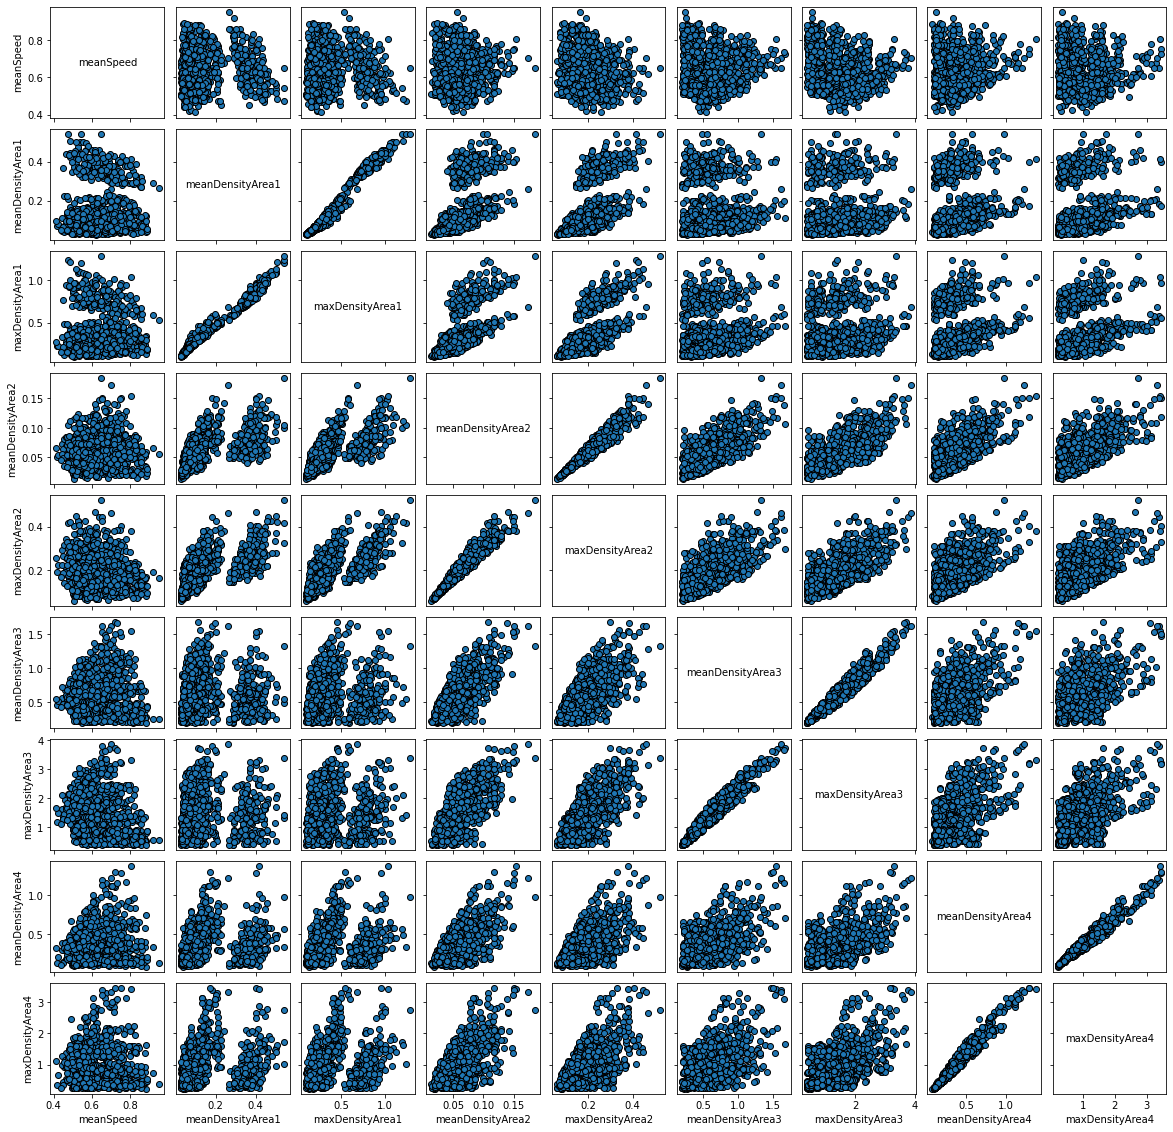

In [9]:
from ema_workbench.analysis import pairs_plotting

fig, axes = pairs_plotting.pairs_scatter(
    experiments,
    results,
)

fig.set_size_inches(20, 20)
plt.show()

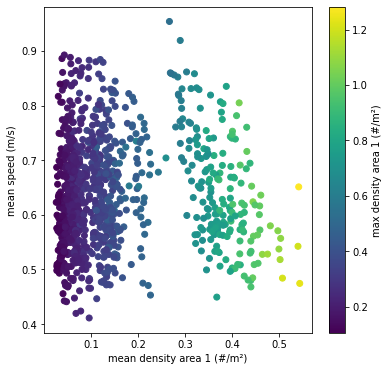

In [10]:
fig, ax = plt.subplots(figsize=(6,6))

sc = ax.scatter(results['meanDensityArea1'], results['meanSpeed'], c=results['maxDensityArea1'])
cbar = plt.colorbar(sc)
cbar.set_label('max density area 1 (#/m²)')
ax.set_xlabel('mean density area 1 (#/m²)')
ax.set_ylabel('mean speed (m/s)')
plt.show()

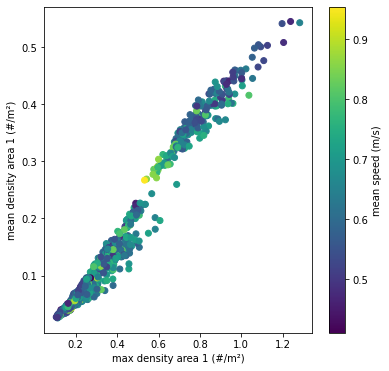

In [11]:
fig, ax = plt.subplots(figsize=(6,6))

sc = ax.scatter(results['maxDensityArea1'], results['meanDensityArea1'], c=results['meanSpeed'])
cbar = plt.colorbar(sc)
cbar.set_label('mean speed (m/s)')
ax.set_xlabel('max density area 1 (#/m²)')
ax.set_ylabel('mean density area 1 (#/m²)')
plt.show()

## Linear regression model

In [9]:
import statsmodels.api as sm

# add constant
X_0 = sm.add_constant(X)

In [10]:
# specify outcome to fit linear regression on
# outcome = 'meanDensityArea1'
outcome = 'meanSpeed'

In [11]:
est = sm.OLS(results_df[outcome], X_0.astype(float)).fit()
print(est.summary())
print(est.params)

                            OLS Regression Results                            
Dep. Variable:              meanSpeed   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     1273.
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        16:18:55   Log-Likelihood:                 2175.3
No. Observations:                1000   AIC:                            -4331.
Df Residuals:                     990   BIC:                            -4282.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2328    

## Feature scoring

In [15]:
from ema_workbench.analysis import feature_scoring

# use the extra trees algorithm
fs = feature_scoring.get_feature_scores_all(
    x=X,
    y=results,
    alg='extra trees',
)

/home/tevito/anaconda3/envs/CrowdSim/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/tevito/anaconda3/envs/CrowdSim/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
<frozen importlib._bootstrap>:914: ImportWarning: ShimImporter.find_spec() not found; falling back to find_module()
/home/tevito/anaconda3/envs/CrowdSim/lib/python3.10/site-packages/ema_workbench-2.1.1-py3.10.egg/ema_workbench/analysis/feature_scoring.py:389: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  complete = complete.append(fs.T, sort=True)
/home/tevito/anaconda3/envs/CrowdSim/lib/python3.10/site-pack

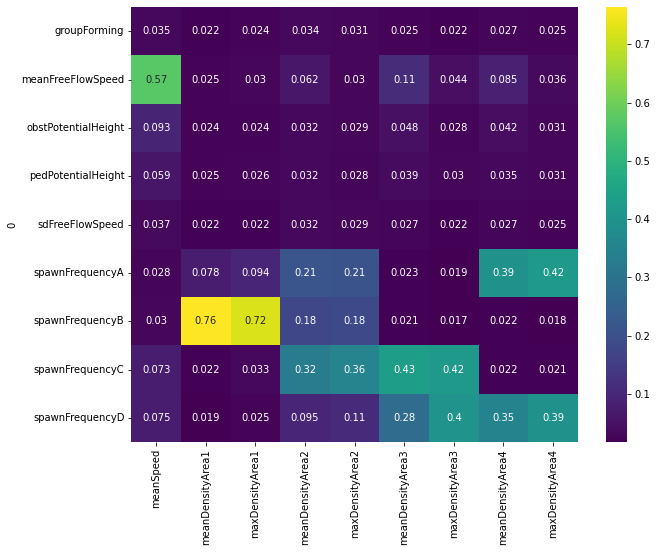

In [16]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(fs,
            cmap="viridis",
            annot=True,
            ax=ax)
plt.show()

In [17]:
# repeat for binary clasification
from ema_workbench.analysis import RuleInductionType

x = experiments
y = (
    (results['meanDensityArea1'] > 0.80) |
    (results['meanDensityArea2'] > 0.80) |
    (results['meanDensityArea3'] > 0.80) |
    (results['meanDensityArea4'] > 0.80) 
)

fs, alg = feature_scoring.get_ex_feature_scores(
    x, y, mode=RuleInductionType.CLASSIFICATION
)
fs.sort_values(ascending=False, by=1)

,1
0,
spawnFrequencyC,0.288546
spawnFrequencyD,0.232963
meanFreeFlowSpeed,0.150777
obstPotentialHeight,0.072363
pedPotentialHeight,0.064621
spawnFrequencyA,0.054726
sdFreeFlowSpeed,0.050320
groupForming,0.047590
spawnFrequencyB,0.038093


## PRIM

In [18]:
x = experiments
y = (
    (results['meanDensityArea1'] > 0.80) |
    (results['meanDensityArea2'] > 0.80) |
    (results['meanDensityArea3'] > 0.80) |
    (results['meanDensityArea4'] > 0.80) 
)
prim_alg = prim.Prim(
    x,
    y,
    threshold=0.6)
box = prim_alg.find_box()

In [19]:
sum(y)

240

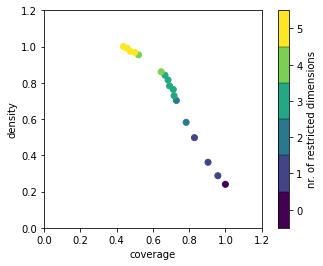

In [20]:
box.show_tradeoff()
plt.show()

In [36]:
chosen_point = 8

coverage    0.4375
density        1.0
id              16
mass         0.105
mean           1.0
res_dim          5
Name: 16, dtype: object

                       box 16                                           
                          min        max                       qp values
spawnFrequencyC      1.000000   2.500000   [-1.0, 4.592023544382153e-20]
spawnFrequencyD      1.000000   2.500000   [-1.0, 5.138800159422471e-19]
obstPotentialHeight  2.002528   9.044510     [-1.0, 0.16103509043295336]
pedPotentialHeight   5.018255  45.367872     [-1.0, 0.38665102784686856]
meanFreeFlowSpeed    0.834136   1.159712  [1.1056035712499473e-06, -1.0]



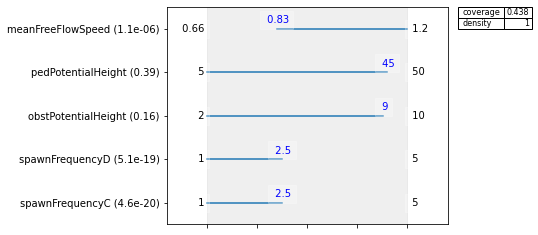

In [39]:
box.inspect()
box.inspect(style="graph")
plt.show()

coverage    0.691667
density     0.783019
id                 8
mass           0.212
mean        0.783019
res_dim            3
Name: 8, dtype: object

                      box 8                                          
                        min       max                       qp values
spawnFrequencyC    1.000000  2.500000  [-1.0, 1.6769104856076525e-26]
spawnFrequencyD    1.000000  3.500000  [-1.0, 1.0049177059414065e-11]
meanFreeFlowSpeed  0.754391  1.159712    [0.005501283692951616, -1.0]



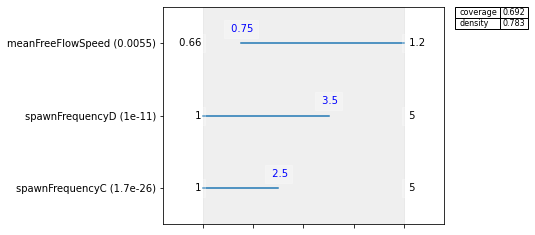

In [40]:
box.inspect(chosen_point)
box.inspect(chosen_point, style="graph")
plt.show()

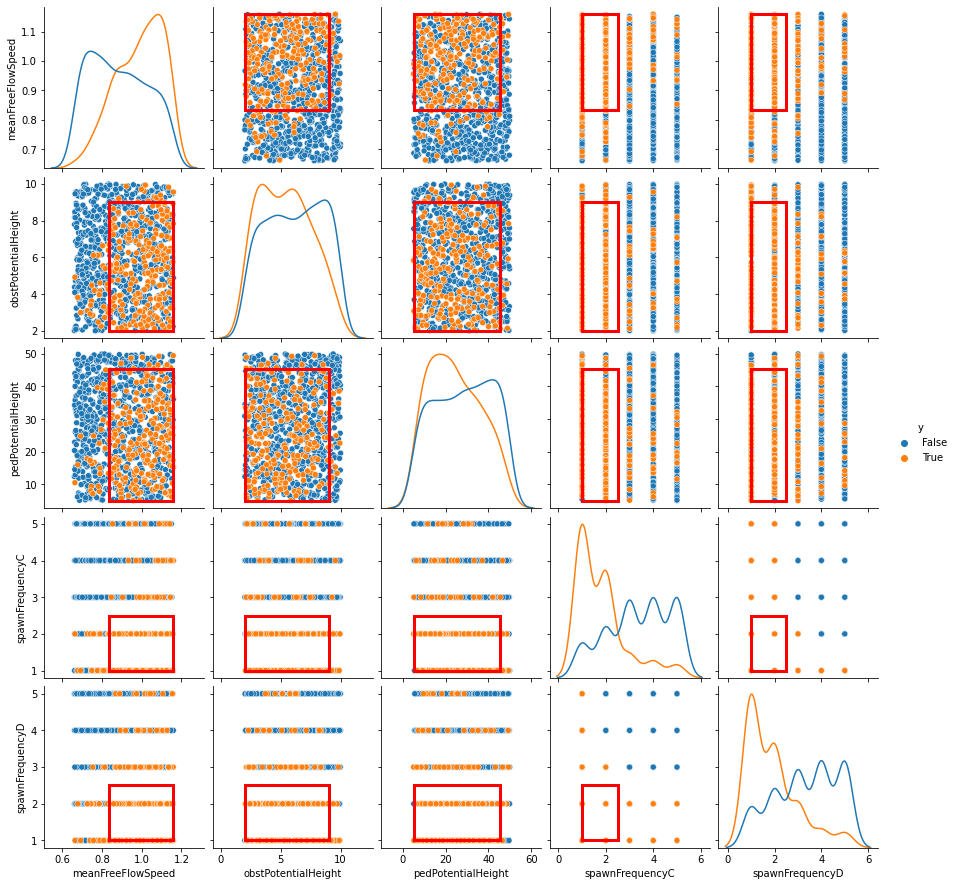

In [41]:
box.show_pairs_scatter()
plt.show()